In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV


In [2]:
dt = pd.read_csv('heart_new.csv')

In [3]:
dt.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


As we can see from above dataset entries some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description

# Data Cleaning & Preprocessing 

In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables



In [4]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'


dt['st_slope'][dt['st_slope'] == 0] = 'normal'
dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [6]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


As we can see features are encoded sucessfully to their respective categories. Next we will be checking if there is any missing entry or not ?

In [7]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

So, there are no missing entries in the dataset thats great. Next we will move towards exploring the dataset by performing detailed EDA

# Exploratory Data Analysis (EDA)

In [8]:
# first checking the shape of the dataset
dt.shape

(1190, 12)

So, there are total 1190 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [9]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [10]:
# summary statistics of categorical columns
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1190,1190,1190,1190
unique,2,4,3,4
top,male,asymptomatic,normal,flat
freq,909,625,684,582


# Distribution of Heart disease (target variable)

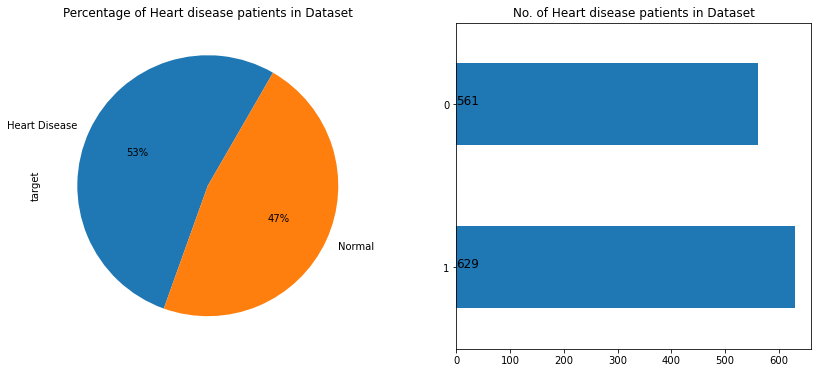

In [11]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 629 heart disease patients and 561 normal patients

# Checking Gender & Agewise Distribution

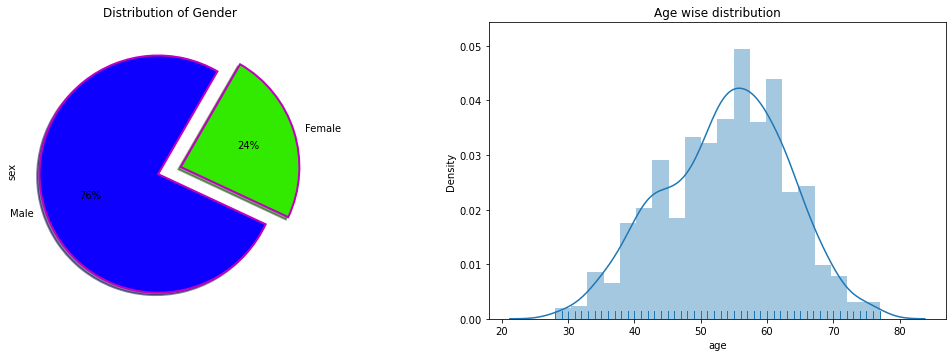

In [12]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"m"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

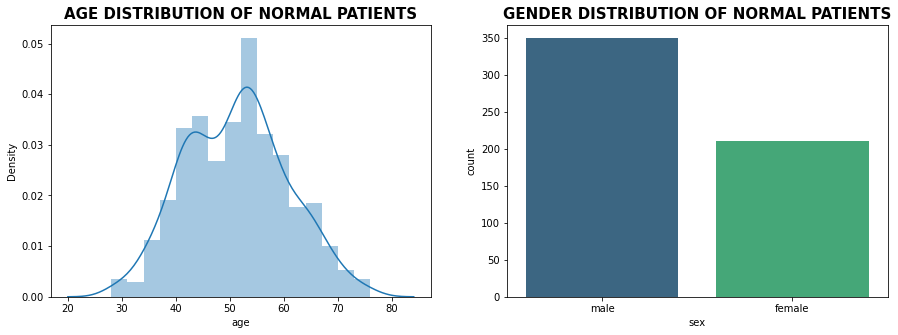

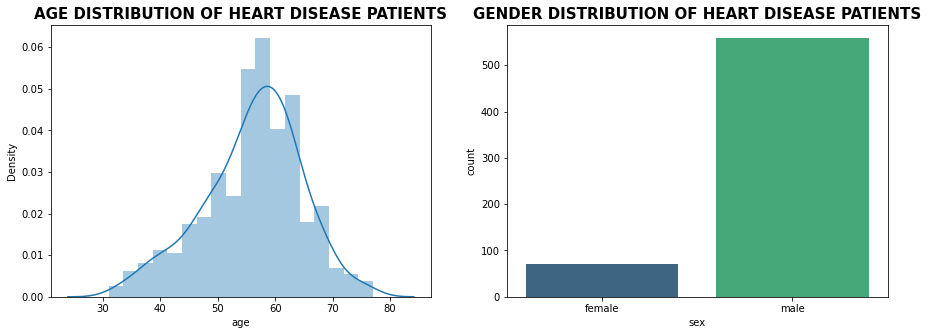

In [13]:
attr_1=dt[dt['target']==1]
attr_0=dt[dt['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()


As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

# Distribution of Chest Pain Type

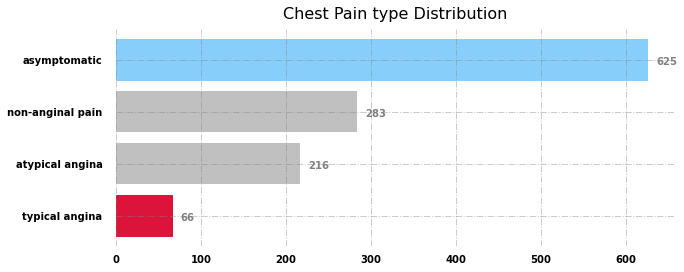

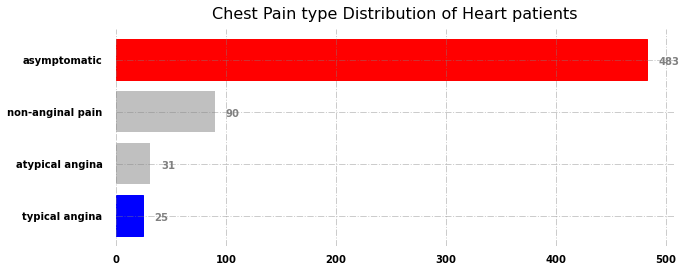

In [14]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [15]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.790000
atypical angina,32.980000,4.930000
non-anginal pain,34.400000,14.310000
typical angina,7.310000,3.970000


As we can see from above plot 76% of the chest pain type of the heart disease patients have asymptomatic chest pain.

Asymptomatic heart attacks medically known as silent myocardial infarction (SMI) annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored.

# Distribution of Rest ECG

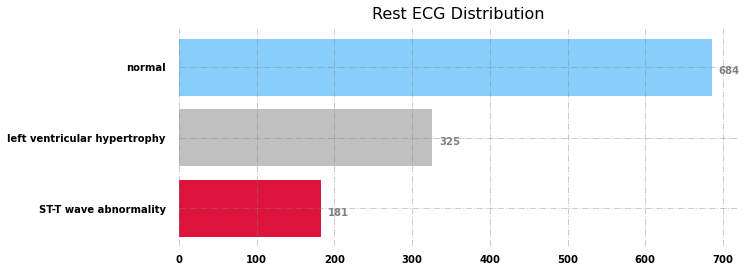

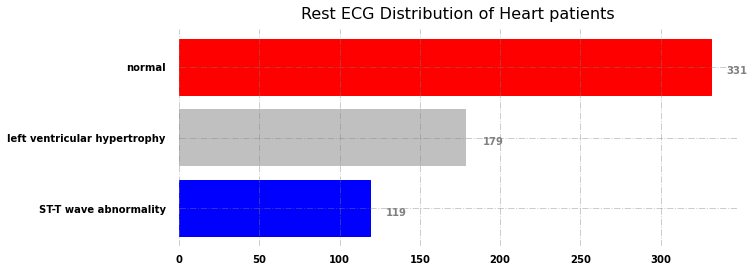

In [16]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [17]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.920000
left ventricular hypertrophy,26.020000,28.460000
normal,62.920000,52.620000


An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG

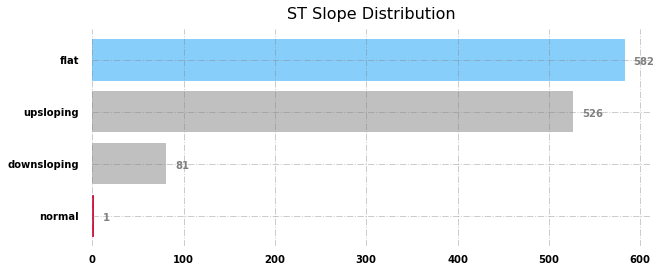

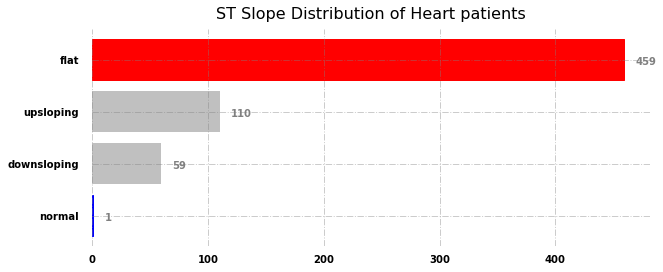

In [18]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [19]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.380000
flat,21.930000,72.970000
normal,0.000000,0.160000
upsloping,74.150000,17.490000


The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers.

As we can see from above plot upsloping is positive sign as 74% of the normal patients have upslope where as 72.97% heart patients have flat sloping.

Distribution of Numerical features

# Distribution of Numerical features

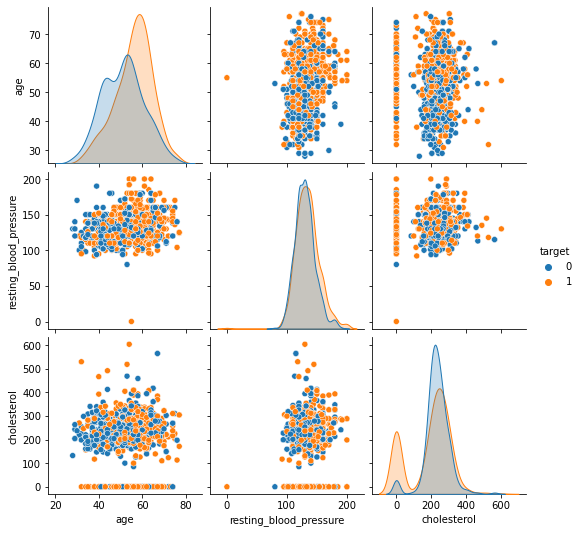

In [20]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

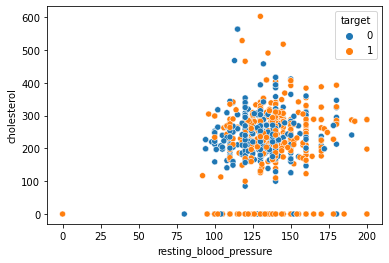

In [21]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

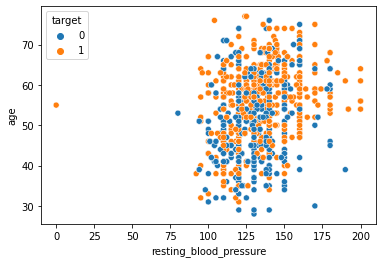

In [22]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

# Heat map

(8.3, -0.3)

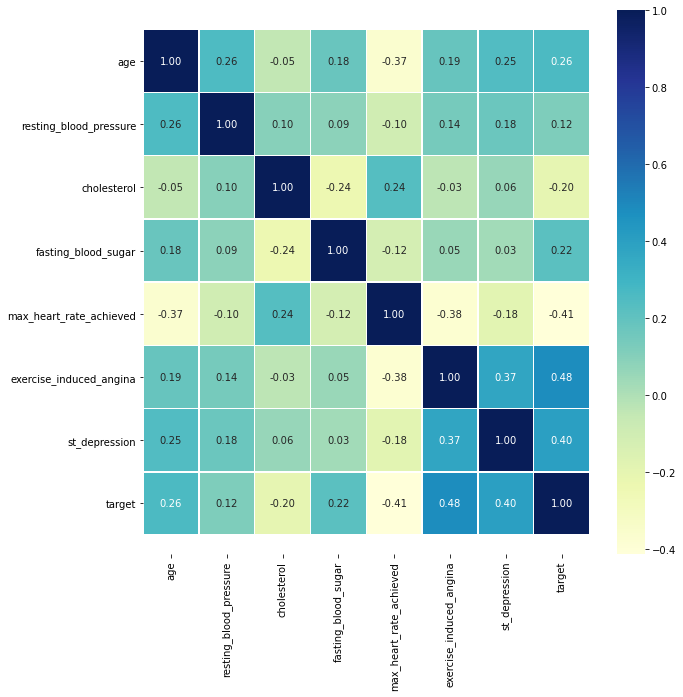

In [23]:
corr_matrix = dt.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.3, top - 0.3)


# Outlier Detection & Removal

In [24]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [25]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [26]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.46672783 0.42732826 0.7756736  1.26503857]
 [0.50460037 1.51658739 0.29951178 0.63775761]
 [1.78743698 0.11730131 0.71648908 1.63613587]
 ...
 [0.35062404 0.11730131 0.782852   0.96964985]
 [0.35062404 0.11730131 0.25287704 1.34344869]
 [1.68053393 0.31840234 0.34883221 1.30424363]]


from these points it is diffciult to say which points are outliers so we will now define threshold

In [27]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  593,
        618,  734,  761, 1013, 1039, 1075]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [28]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [29]:
# checking shape of dataset after outlier removal
dt.shape


(1173, 12)

Great !! all the 17 data points which are outliers are now removed.

Now before splitting dataset into train and test we first encode categorical variables as dummy variables and segregate feature and target variable.

In [30]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,0,1


In [31]:
# checking the shape of dataset
dt.shape


(1173, 17)

# Here i will do feature importance

1: Relief 2: minimal redudancy maximal relevance 3 :shrinkage 4:selection opertion (LASSO)

# seprating categorical and numerical

categorical_val = []
continous_val = []
for column in dt.columns:
    print('==============================')
    print(f"{column} : {dt[column].unique()}")
    if len(dt[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

# one hot encoding

if 'target'  in categorical_val:
    categorical_val.remove('target')
    dataset = pd.get_dummies(dt, columns = categorical_val)
else:
    pass

dt.head()


In [32]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

# Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [34]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(938, 16)
(938,)
------------Test Set------------------
(235, 16)
(235,)


# feature normalization

In this step we will normalize all the numeric feature in the range of 0 to 1

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1167,0.591837,0.193548,0.682281,0,0.562963,1,0.584416,1,0,0,0,0,1,1,0,0
787,0.836735,0.731183,0.476578,1,0.474074,0,0.207792,1,0,0,1,1,0,1,0,0
208,0.142857,0.193548,0.523422,0,0.540741,0,0.194805,1,1,0,0,0,1,1,0,0
617,0.857143,0.408602,0.655804,0,0.311111,0,0.506494,1,0,0,0,1,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,0,1


In [36]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1098,0.204082,0.301075,0.470468,0,0.851852,1,0.688312,1,0,0,1,0,1,1,0,0
835,0.530612,0.301075,0.525458,0,0.592593,0,0.246753,1,0,1,0,1,0,1,0,0
670,0.714286,0.516129,0.397149,0,0.829630,0,0.194805,0,1,0,0,0,1,0,0,1
502,0.714286,0.408602,0.627291,0,0.525926,1,0.454545,1,0,0,0,0,1,1,0,0
498,0.673469,0.580645,0.490835,0,0.600000,1,0.584416,1,0,0,0,0,1,0,0,0


# DECISION TREE 

In [37]:
from sklearn. tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }


tree1 = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree1, params, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)



In [38]:
#GRID SEARCH FOR BEST WEIGHTS 
#grid_search_cv.fit(X_train, y_train)

In [39]:
#grid_search_cv.best_estimator_ 

In [40]:
#grid_search_cv.best_score_
#grid_search_cv.best_params_


In [41]:
tree1 = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=16,
                              min_samples_leaf=1, 
                              min_samples_split=4, 
                               random_state=4,
                              splitter='random')

In [42]:
tree1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_split=4,
                       random_state=4, splitter='random')

In [43]:
#function for for confusion MATRIX
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef
train_score_1x={}

f1_train1x={}
precision_train1x={}
recall_train1x={}
test_score_1x={}
f1_test1x={}
precision_test1x={}
recall_test1x={}
mcc_test={}
mcc_train={}
def print_score(algo_name,clf, X_train, y_train, X_test, y_test, train=True):
    #
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print("\nMathews correlation coefficent below for training data:\n================================")
        print(matthews_corrcoef(y_train, pred),"\n")
        train_score_1x["Training score "+algo_name]=accuracy_score(y_train, pred) * 100
        f1_train1x[algo_name+" training f1 score "]=f1_score(y_train, pred) * 100
        precision_train1x[algo_name+" training precision score"]=precision_score(y_train, pred) * 100
        recall_train1x[algo_name+" training recall score"]= recall_score(y_train, pred) * 100
        mcc_test[algo_name+" mcc score"]=matthews_corrcoef(y_train, pred)
        
    elif train==False:
        pred = clf.predict(X_test)
        print('######################################################################')
        print('#####################################################################\n\n')
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        test_score_1x["Testing score"+algo_name]=accuracy_score(y_test, pred) * 100
        f1_test1x[algo_name+" testing f1 score"]=f1_score(y_test, pred) * 100
        precision_test1x[algo_name+" testing precision score"]=precision_score(y_test, pred) * 100
        recall_test1x[algo_name+" testing recall score"]= recall_score(y_test, pred) * 100
        print("\nMathews correlation coefficent for test data: \n================================")
        print(matthews_corrcoef(y_test, pred))
        mcc_train[algo_name+" mcc score"]=matthews_corrcoef(y_test, pred)
    #return f1_train , precision_train ,recall_train,f1_test,precision_test,recall_test

In [44]:

print_score("Decision tree",tree1,X_train, y_train, X_test, y_test, train=True)
print_score("Decision tree",tree1, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 98.29%
_______________________________________________
Classification Report:	Precision Score: 98.77%
			Recall Score: 97.97%
			F1 score: 98.37%
_______________________________________________
Confusion Matrix: 
 [[440   6]
 [ 10 482]]


Mathews correlation coefficent below for training data:
0.965852218165912 

######################################################################
#####################################################################


Test Result:
Accuracy Score: 83.40%
_______________________________________________
Classification Report:	Precision Score: 85.00%
			Recall Score: 82.93%
			F1 score: 83.95%
_______________________________________________
Confusion Matrix: 
 [[ 94  18]
 [ 21 102]]


Mathews correlation coefficent for test data: 
0.6679724026767626


# Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

params1 = {"solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga"), 
           
          "C":(list(range(1, 100)))  ,
           "multi_class":("auto", "ovr")
          }
log_reg = LogisticRegression(random_state=42,solver="liblinear")

#grid_search_cv = GridSearchCV(log_reg, params1, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

#grid_search_cv.fit(X_train, y_train)


#log_reg.fit(X_train,y_train)

In [46]:
#grid_search_cv.best_estimator_ 

In [47]:
log_reg = LogisticRegression(C=1,solver="newton-cg")
log_reg.fit(X_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [48]:
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=True)
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.82%
_______________________________________________
Classification Report:	Precision Score: 85.54%
			Recall Score: 87.80%
			F1 score: 86.66%
_______________________________________________
Confusion Matrix: 
 [[373  73]
 [ 60 432]]


Mathews correlation coefficent below for training data:
0.7156234360884202 

######################################################################
#####################################################################


Test Result:
Accuracy Score: 80.43%
_______________________________________________
Classification Report:	Precision Score: 77.70%
			Recall Score: 87.80%
			F1 score: 82.44%
_______________________________________________
Confusion Matrix: 
 [[ 81  31]
 [ 15 108]]


Mathews correlation coefficent for test data: 
0.610918219931472


In [49]:
dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,0,1


# SVM

In [50]:
from sklearn import svm
params= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [51]:
svm1 = svm.SVC(kernel='linear') 
#svmrn=RandomizedSearchCV(svm1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);
#svmrn.fit(X_train, y_train)

In [52]:
#svmrn.best_estimator_

In [53]:
svm1=svm.SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
svm1.fit(X_train, y_train)

SVC(C=100, gamma=0.1)

In [55]:
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=True)
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.90%
_______________________________________________
Classification Report:	Precision Score: 90.47%
			Recall Score: 94.51%
			F1 score: 92.45%
_______________________________________________
Confusion Matrix: 
 [[397  49]
 [ 27 465]]


Mathews correlation coefficent below for training data:
0.838118345045446 

######################################################################
#####################################################################


Test Result:
Accuracy Score: 84.68%
_______________________________________________
Classification Report:	Precision Score: 83.72%
			Recall Score: 87.80%
			F1 score: 85.71%
_______________________________________________
Confusion Matrix: 
 [[ 91  21]
 [ 15 108]]


Mathews correlation coefficent for test data: 
0.693119539245443


# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 85.11%


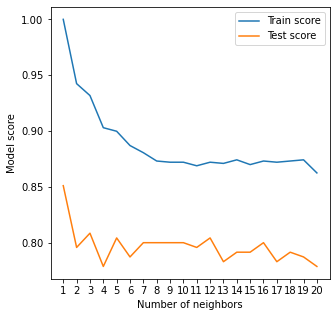

In [57]:
plt.figure(figsize=(5,5))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [58]:
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)

print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 87.42%
_______________________________________________
Classification Report:	Precision Score: 85.42%
			Recall Score: 91.67%
			F1 score: 88.43%
_______________________________________________
Confusion Matrix: 
 [[369  77]
 [ 41 451]]


Mathews correlation coefficent below for training data:
0.7490766197540026 

######################################################################
#####################################################################


Test Result:
Accuracy Score: 78.72%
_______________________________________________
Classification Report:	Precision Score: 76.64%
			Recall Score: 85.37%
			F1 score: 80.77%
_______________________________________________
Confusion Matrix: 
 [[ 80  32]
 [ 18 105]]


Mathews correlation coefficent for test data: 
0.5752994426751952


# Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier


n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier()

grid_search_cv2 = GridSearchCV(rand_forest, random_grid, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)




In [60]:
#grid_search_cv2.fit(X_train, y_train)

In [61]:
#grid_search_cv2.best_params_

In [62]:
rand_forest = RandomForestClassifier(bootstrap= True,max_depth= 10, min_samples_split= 5, n_estimators= 200)

rand_forest.fit(X_train,y_train);

In [63]:
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.76%
_______________________________________________
Classification Report:	Precision Score: 96.82%
			Recall Score: 98.98%
			F1 score: 97.89%
_______________________________________________
Confusion Matrix: 
 [[430  16]
 [  5 487]]


Mathews correlation coefficent below for training data:
0.9553288026760276 

######################################################################
#####################################################################


Test Result:
Accuracy Score: 87.66%
_______________________________________________
Classification Report:	Precision Score: 85.07%
			Recall Score: 92.68%
			F1 score: 88.72%
_______________________________________________
Confusion Matrix: 
 [[ 92  20]
 [  9 114]]


Mathews correlation coefficent for test data: 
0.7549179584383408


# Xgboost

In [64]:
params={
    "learning_rate" :  [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [94]:
from xgboost import XGBClassifier 
xgboost1 = XGBClassifier(min_child_weight= 1,max_depth= 8, 
                         learning_rate=0.15,gamma=0.4,colsample_bytree=0.5,eval_metric='mlogloss');
#xgboost1=RandomizedSearchCV(xgboost1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);

xgboost1.fit(X_train, y_train);

In [95]:
print_score("*xgboost",xgboost1 , X_train, y_train, X_test, y_test, train=True)
print_score("*xgboost",xgboost1 , X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.89%
_______________________________________________
Classification Report:	Precision Score: 99.80%
			Recall Score: 100.00%
			F1 score: 99.90%
_______________________________________________
Confusion Matrix: 
 [[445   1]
 [  0 492]]


Mathews correlation coefficent below for training data:
0.9978647192602385 

######################################################################
#####################################################################


Test Result:
Accuracy Score: 88.94%
_______________________________________________
Classification Report:	Precision Score: 88.19%
			Recall Score: 91.06%
			F1 score: 89.60%
_______________________________________________
Confusion Matrix: 
 [[ 97  15]
 [ 11 112]]


Mathews correlation coefficent for test data: 
0.7783373694385383


# Naive Bayes


In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
gnb = GaussianNB()

# Voting Classifier

In [96]:
from sklearn.ensemble import VotingClassifier 


In [128]:
voting_clf = VotingClassifier( estimators=[
                                          ('lr',log_reg ), 
                                         ('knn',knn_classifier ),
                                          ('dt',tree1),
                                         ('rf',rand_forest),
                                          ('xgb',xgboost1),
                                          
                                          
                                          ],
                                            voting ='soft')
voting_clf.fit(X_train,y_train);

In [129]:
for clf in (
            log_reg,
            knn_classifier,
            tree1,
            rand_forest,
            xgboost1,
            svm1,
            voting_clf):
    voting_clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)*100);

LogisticRegression 80.42553191489363
KNeighborsClassifier 78.72340425531915
DecisionTreeClassifier 83.40425531914893
RandomForestClassifier 87.65957446808511
XGBClassifier 88.93617021276596
SVC 84.68085106382979
VotingClassifier 86.38297872340426


In [106]:
print_score("Voting Classifier", voting_clf,X_train, y_train, X_test, y_test, train=True)
print_score("Voting Classifier",voting_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.76%
_______________________________________________
Classification Report:	Precision Score: 96.82%
			Recall Score: 98.98%
			F1 score: 97.89%
_______________________________________________
Confusion Matrix: 
 [[430  16]
 [  5 487]]


Mathews correlation coefficent below for training data:
0.9553288026760276 

######################################################################
#####################################################################


Test Result:
Accuracy Score: 86.38%
_______________________________________________
Classification Report:	Precision Score: 83.70%
			Recall Score: 91.87%
			F1 score: 87.60%
_______________________________________________
Confusion Matrix: 
 [[ 90  22]
 [ 10 113]]


Mathews correlation coefficent for test data: 
0.7296164707801561
